In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Trabajo con los datos del Titanic

       Lectura

In [81]:
df=pd.read_csv('titanic.csv')

In [82]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
df.shape

(891, 12)

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


      Representacion de nulos

<Axes: >

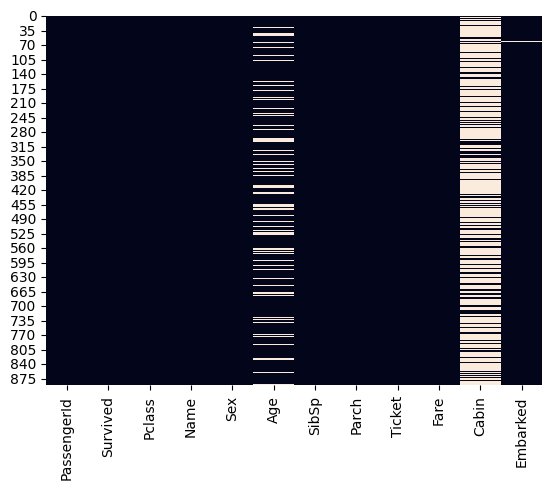

In [85]:
sns.heatmap(df.isnull()  , cbar=False)

Porcentaje de nulos por columna

In [86]:
nulos = df.isnull().mean()*100
nulos

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Eliminamos "Cabin" tiene demasiados valores nulos , aunque la reparemos los valores nuevos no van a estar cerca de los valores reales

In [87]:
df=df.drop('Cabin',axis=1)


<Axes: >

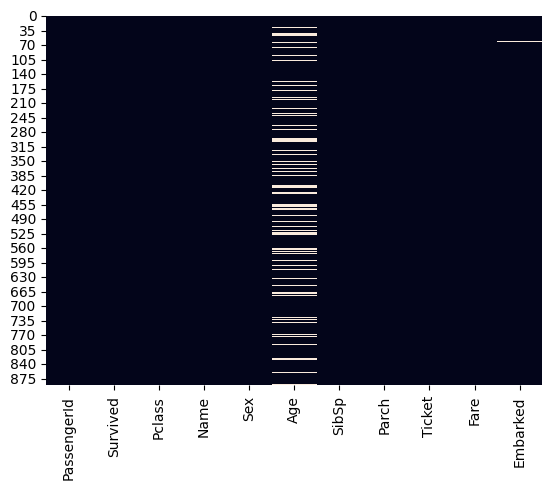

In [88]:
sns.heatmap(df.isnull(), cbar=False)

Reparamos "Age"

In [89]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

      Reparar valores

<Axes: >

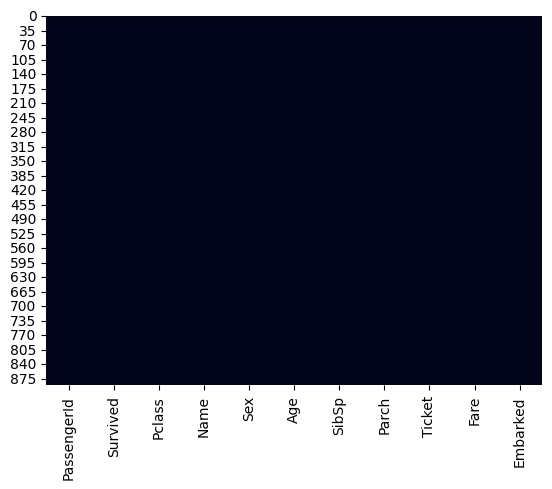

In [90]:
def reparar_valores(df):    
    for name in df.columns:        
        if (df[name].isnull().any()): 
            if df[name].dtype == np.dtype('O'): 
                df[name].fillna(df[name].mode()[0], inplace=True)
            else:
                df[name].fillna(df[name].mean(), inplace=True)
    return df

df= reparar_valores(df)
sns.heatmap(df.isnull(), cbar=False)


In [91]:
df["Age"]=df["Age"].astype(int)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S


In [92]:
df['Fare']=df["Fare"].astype(int)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S


      Aqui empezamos el trabajo con los datos 

Pasajeros por clase

In [93]:
fig = px.bar(df, x="Pclass", y="PassengerId", color="Pclass",labels={"PassengerId": "ID", "Pclass": "Clase"},
             text="Pclass", title="Pasajeros por clase", template="plotly_dark")
fig.show()


Pasajeros por puerto

In [94]:
fig = px.bar(df, x="Embarked", y="PassengerId", color="Embarked",labels={"PassengerId": "ID", "Embarked": "Puerto"},
             text="Embarked", title="Pasajeros por Puerto", template="plotly_dark")
fig.show()

Distribucion de edades

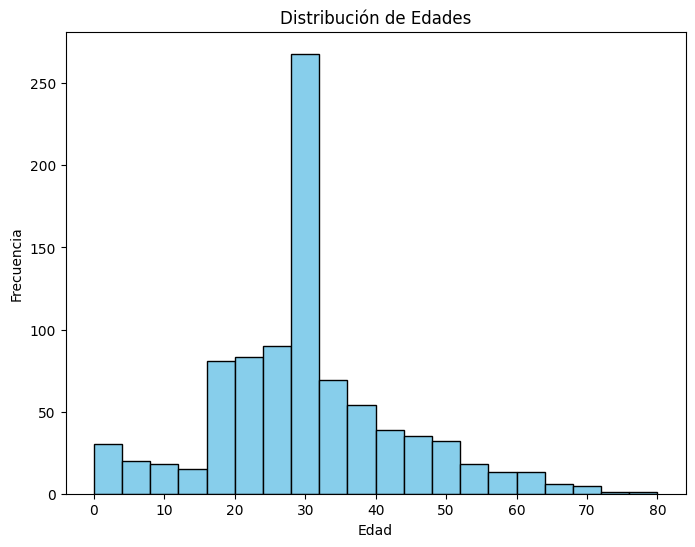

In [95]:
plt.figure(figsize=(8, 6))
plt.hist(df["Age"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edades")
plt.show()

Distibucion de sobrevivientes entre hombres y mujeres

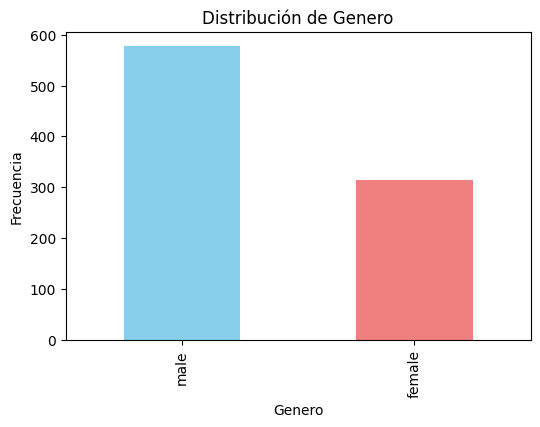

In [96]:
#Esto es al iniciar el viaje
plt.figure(figsize=(6, 4))
df["Sex"].value_counts().plot(kind="bar", color=['skyblue', 'lightcoral'])
plt.xlabel("Genero")
plt.ylabel("Frecuencia")
plt.title("Distribución de Genero")
plt.show()

In [97]:
sobrevivientes = df[df["Survived"] == 1]

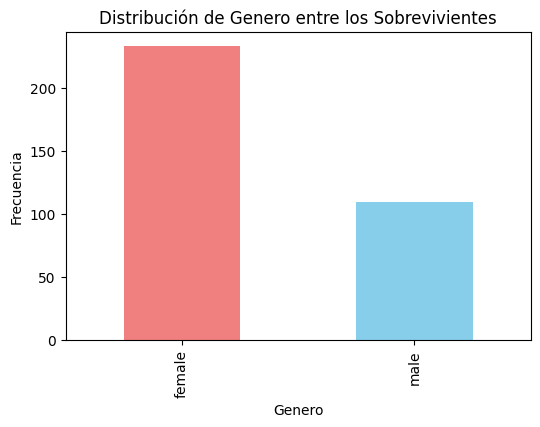

In [98]:

plt.figure(figsize=(6, 4))
sobrevivientes["Sex"].value_counts().plot(kind="bar", color=['lightcoral', 'skyblue'])
plt.xlabel("Genero")
plt.ylabel("Frecuencia")
plt.title("Distribución de Genero entre los Sobrevivientes")
plt.show()

Otra manera de verlo 

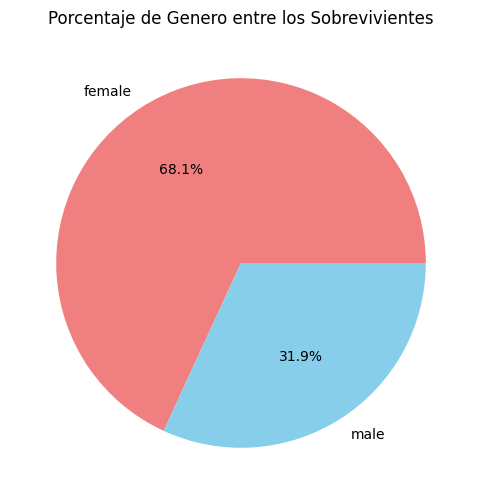

In [99]:
sexo = sobrevivientes["Sex"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sexo, labels=sexo.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title("Porcentaje de Genero entre los Sobrevivientes")
plt.show()

In [100]:
px.pie(df, values='Survived', names='Sex', template="plotly_dark", title="Sobrevivientes por sexo" ).show()

Tasa de supervivencia por familia 

In [101]:
df['Familia'] = df['SibSp'] + df['Parch']
s = df.groupby('Familia')['Survived'].mean().reset_index()

In [102]:
fig = px.bar(s, x='Familia', y='Survived', 
             labels={'Familia': 'Tamanho de Familia', 'Survived': 'Tasa de Supervivencia'},
             title='Tasa de Supervivencia por Tamanho de Familia')
fig.show()

Cantidad de Pasajeros por clase

In [103]:
class_count = df['Pclass'].value_counts().sort_index()
fig = go.Figure(go.Bar(x=class_count.index, y=class_count.values, text=class_count.values, textposition='auto'))
fig.update_layout(title='Pasajeros por clase en el Titanic', xaxis_title='Clase', yaxis_title='Cantidad de pasajeros')
fig.show()

Edad promedio por clase

In [104]:
edad_prom = df.groupby("Pclass")["Age"].mean().reset_index()
fig = px.bar(edad_prom, x="Pclass", y="Age", title="Edad Promedio por Clase")
fig.show()

Porcentaje de sobrevivientes de primera , segunda y tercera clase

In [105]:
sob = df.groupby('Pclass')['Survived'].mean() * 100
sobdf = sob.reset_index()


In [106]:
fig = px.bar(sobdf, x='Pclass', y='Survived',
             labels={'Pclass': 'Clase'},
             title='Porcentaje de Sobrevivientes por Clase')
fig.show()

In [107]:
fig = px.pie(sobdf, names='Pclass', values='Survived',
             title='Porcentaje de Sobrevivientes por Clase')
fig.show()

Distribucion entre edad y coste del ticket

In [108]:
fig = px.scatter(df, x="Age", y="Fare",color="Sex" ,title="Gráfico de Dispersión entre Edad y coste")
fig.show()

Personas mayores y menores de edad por puerto

In [161]:
def clasificar_edad(edad):
    if edad >= 18:
        return "Mayores"
    else:
        return "Menores"


df['Grupo de Edad'] = df['Age'].apply(clasificar_edad) # usa la funcion para crear la columna nueva

In [162]:
color = ["#FF5733", "#338DFF"]
fig = px.bar(df, x="Embarked", color="Grupo de Edad",
             template='plotly_dark', 
             title="Personas por Grupo de Edad Embarcadas por Puerto",
             color_discrete_sequence=color)
fig.show()

Mayores y menores (Separadas)

In [112]:
mayores= df[df["Age"] >= 18]
fig = px.bar(mayores, x="Embarked", color='Embarked',title="Personas Mayores de Edad Embarcadas por Puerto")
fig.show()

In [113]:
menores= df[df["Age"] <= 18]
fig = px.bar(menores, x="Embarked", color='Embarked',title="Personas Mayores de Edad Embarcadas por Puerto")
fig.show()

Nombre de los sobrevivienes que embarcaron por Southampton y estaban entre 20 y 25 anhos siendo de primera clase

In [114]:
filtro = (df['Age'] >= 20) & (df['Age'] <= 25) & (df['Pclass'] == 1) & (df['Embarked'] == 'S') & (df['Survived'] == 1)
dato = df[filtro]
dato

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familia,Grupo de Edad
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263,S,5,Mayores
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22,1,0,113776,66,S,1,Mayores
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263,S,5,Mayores
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22,0,1,113505,55,S,1,Mayores
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21,0,0,13502,77,S,0,Mayores
708,709,1,1,"Cleaver, Miss. Alice",female,22,0,0,113781,151,S,0,Mayores


In [115]:
fig = px.bar(dato, x='Age', y='Name',
             color='Name',
             height=400)
fig.show()

Nombre de los hombres(mujeres no hay con estas condiciones)de entre 30-40 anhos embarcaron por por Cherbourg siendo de tercera clase y su id estaba entre 100 y 300

In [116]:
filtro1 = (df['Age'] >= 30) & (df['Age'] <= 40) & (df['Pclass'] == 3) & (df['Embarked'] == 'C') & (df['PassengerId'] >=100) & (df['PassengerId']<=300) & (df['Sex']=='male')
dato1 = df[filtro1]
dato1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familia,Grupo de Edad
130,131,0,3,"Drazenoic, Mr. Jozef",male,33,0,0,349241,7,C,0,Mayores
244,245,0,3,"Attalah, Mr. Sleiman",male,30,0,0,2694,7,C,0,Mayores
285,286,0,3,"Stankovic, Mr. Ivan",male,33,0,0,349239,8,C,0,Mayores


In [117]:
fig = px.bar(dato1, x='Name', y='Age',
             color='Fare',
             height=400)
fig.show()

Hombres y mujeres sobrevivieron siendo menores de edad (-18)

In [118]:
menores = df[df["Age"] < 18]
sob_menores = menores[menores["Survived"] == 1]

In [119]:
fig = px.bar(sob_menores, x="Sex", color='Sex',title="Sobrevivientes Menores de Edad por Genero")
fig.show()

Porcentaje que representan estos menores

In [120]:
fig = px.pie(sob_menores,names="Sex", labels={"Survived": "Supervivientes"},
                template="plotly_dark")
fig.show()

Media de los precios por clase y puerto de embarque

In [121]:
media = df.groupby(['Pclass', 'Embarked'])['Fare'].mean().reset_index()
media.rename(columns={'Fare': 'Media de coste'}, inplace=True)


In [122]:
fig = px.bar(media, x='Pclass', y='Media de coste', color='Embarked',
             labels={'Pclass': 'Clase', 'Media de Fare': 'Media de Fare', 'Embarked': 'Puerto de Embarque'},
             title='Media de Coste por Clase y Puerto de Embarque')
fig.show()

     Tarifas mas caras por clase

In [123]:
caras = df.groupby('Pclass')['Fare'].max().reset_index()
baratas = df.groupby('Pclass')['Fare'].min().reset_index()

In [124]:
fig = px.bar(caras, x='Pclass', y='Fare', color='Pclass', title='Tarifas Más Caras por Clase')
fig.add_bar(x=baratas['Pclass'], y=baratas['Fare'], name='Tarifas Más Baratas')
fig.update_layout(xaxis_title='Clase', yaxis_title='Tarifa (Fare)')
fig.show()

Edad de las personas que lograron sobrevivir q su ticket haya costado mas de 30 ??

In [ ]:
filtro3=(df['Survived'] == 1)&(df['Fare']>30.0)
dato3 = df[filtro3]
dato3

In [126]:
fig = px.scatter(dato3, x="Age", y="Fare", color="Fare", labels={"Age": "Edad", "Fare": "Tarifa"}, 
                  template="plotly_dark")
fig.show()

Personas con numeros de ID pares o no 

In [127]:
def es_par(numero):
    return numero % 2 == 0

df['Par/Impar'] = df['PassengerId'].apply(es_par)
par_impar = df['Par/Impar'].value_counts()


In [128]:
fig = px.bar(df, x='Par/Impar', title='Pasajeros por ID Par/Impar',
             labels={'Par/Impar': 'ID Par/Impar'})
fig.show()

Mujeres menores de 20 anhos tenian un id con numero impar  ?  

In [ ]:
filtro4=(df['Sex'] == 'female')&(df['Age']<20)&(df['PassengerId']%2!=0)
dato4 = df[filtro4]
dato4

In [130]:
fig = px.scatter(dato4, x="PassengerId", y="Age", color="Fare",  size="Age", log_x=False, size_max=30) 
fig.show()

hombres mayores de 50 teian un id con numero par ??

In [ ]:
filtro5=(df['Sex'] == 'male')&(df['Age']>50)&(df['PassengerId']%2==0)
dato5 = df[filtro5]
dato5

In [132]:
fig = px.scatter(dato5, x="PassengerId", y="Age", color="Fare",  size="Age", log_x=False, size_max=30) 
fig.show()

Hombres mayores de edad de segunda clase sobrevivieron?

In [133]:
filtro6=(df['Sex'] == 'male')&(df['Age']>18)&(df['Survived']==1)&(df['Pclass']==2)
dato6 = df[filtro6]
dato6

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familia,Grupo de Edad,Par/Impar
17,18,1,2,"Williams, Mr. Charles Eugene",male,29,0,0,244373,13,S,0,Mayores,True
21,22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13,S,0,Mayores,True
226,227,1,2,"Mellors, Mr. William John",male,19,0,0,SW/PP 751,10,S,0,Mayores,False
288,289,1,2,"Hosono, Mr. Masabumi",male,42,0,0,237798,13,S,0,Mayores,False
543,544,1,2,"Beane, Mr. Edward",male,32,1,0,2908,26,S,1,Mayores,True
547,548,1,2,"Padro y Manent, Mr. Julian",male,29,0,0,SC/PARIS 2146,13,C,0,Mayores,True
570,571,1,2,"Harris, Mr. George",male,62,0,0,S.W./PP 752,10,S,0,Mayores,False
673,674,1,2,"Wilhelms, Mr. Charles",male,31,0,0,244270,13,S,0,Mayores,True


In [134]:
fig = px.bar(dato6, x='Age', y='Name',
             color='Embarked',
             height=400)
fig.show()

Personas de primera clase que embarcaron en Southampton que lograron sobrevivir

In [135]:
stages = ["Personas", "Sobrevivientes", "1ra clase", "Embarked Southampton"]
df_mtl = pd.DataFrame(dict(number=[577, 109, 45, 28], stage=stages))
df_mtl['Sex'] = 'Hombres'
df_toronto = pd.DataFrame(dict(number=[314, 233, 91, 48], stage=stages))
df_toronto['Sex'] = 'Mujeres'
dff = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(dff, x='number', y='stage', color='Sex', template="plotly_dark")
fig.show()

In [ ]:
df.head()

In [137]:
media_edad=int(df['Age'].mean())
media_edad

29

In [138]:
df=pd.read_csv('titanic.csv')
df=df.drop('Cabin',axis=1)
df= reparar_valores(df)
df["Family"]=df["SibSp"]+df["Parch"]

     Que porcentaje de hombres y mujeres sobrevivientes tenian herman@s , espos@s a bordo ?

In [156]:
filtro7=(df['SibSp']!=0)&(df['Survived']==1)
dato7 = df[filtro7]
dato7.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Bebe
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,False


In [140]:
fig = px.pie(dato7,values='SibSp',names="Sex",
                template="plotly_dark")
fig.show()

     Cuantas personas de tercera clase que su familia a bordo consistiera en mas de tres personas sobrevivieron?

In [158]:
filtro8=(df['Survived']==1)&(df['Pclass']==3)&(df['Family']>=3)
dato8 = df[filtro8]
dato8.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Bebe
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S,6,False
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,S,6,False
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,S,3,False


In [142]:
#dato8=dato8.drop(['PassengerId','Survived','SibSp','Parch','Ticket','Pclass'],axis=1)

In [159]:
fig = px.bar(dato8, x='Family', y='Name',
             color='Name',
             height=400)
fig.show()

    Nombre de los bebes y sus clases que abordaron el titanic?(a partir del anho cumplido se considera infante y no bebe)

In [144]:
filtro9=(df['Age']<1)
dato9 = df[filtro9]
dato9

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S,2
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,3
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C,3
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C,3
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S,2
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C,1
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S,2


In [145]:
fig = px.bar(dato9, x='Name', y='Pclass',
             color='Fare',
             height=400)
fig.show()

Porcentaje de Bebes por clase

In [146]:
df['Bebe'] = df['Age'] < 1

por = df.groupby("Pclass")["Bebe"].mean() * 100


pordf = por.reset_index()
pordf.rename(columns={"Bebe": "Porcentaje de Bebes"}, inplace=True)

fig = px.bar(pordf, x="Pclass", y="Porcentaje de Bebes",
             title="Porcentaje de Bebes (<1 año) por Clase")

# Mostrar el gráfico interactivo
fig.show()

In [147]:
px.pie(dato9, values='Age', names='Pclass', template="plotly_dark", title="Porcentaje de bebes a bordo separados por clase" ).show()

Media de los tickes por puerto

In [148]:
media_por_puerto = df.groupby("Embarked")["Fare"].mean()
media_por_puerto_df = media_por_puerto.reset_index()

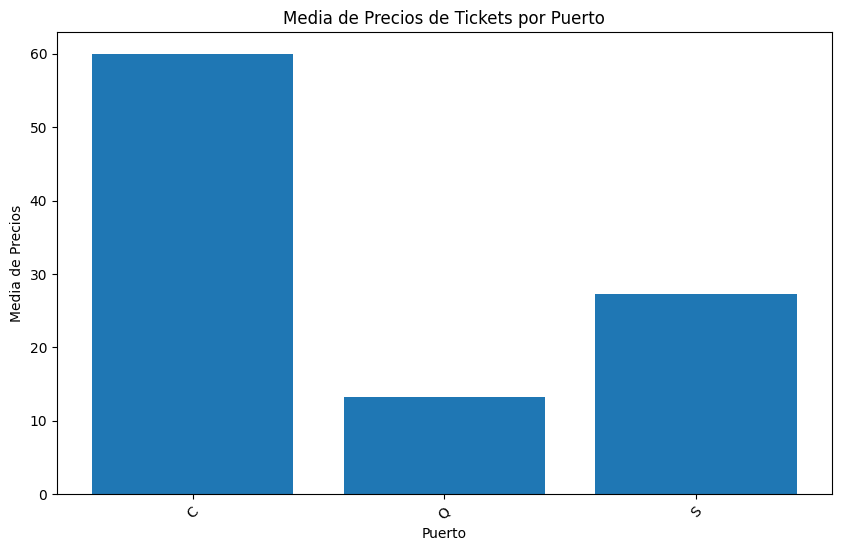

In [149]:
plt.figure(figsize=(10, 6))
plt.bar(media_por_puerto_df["Embarked"], media_por_puerto_df["Fare"])
plt.xlabel("Puerto")
plt.ylabel("Media de Precios")
plt.title("Media de Precios de Tickets por Puerto")
plt.xticks(rotation=45)
plt.show()

In [150]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Bebe
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,False


Grafico de Correlacion

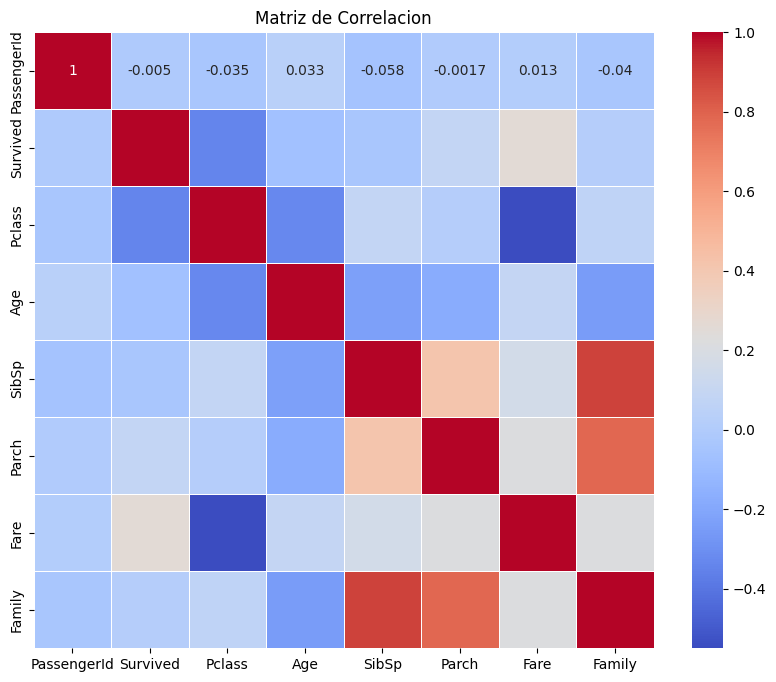

In [151]:
colum_num = df.select_dtypes(include=['int64', 'float64'])

matriz_correlacion = colum_num.corr()#matriz cor

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlacion")
plt.show()

Cargando la tabla de botes salvavidas

In [152]:
URL='https://es.m.wikipedia.org/wiki/Hundimiento_del_RMS_Titanic'
wiki=pd.read_html(URL)

In [153]:
botes=pd.DataFrame()
n=0
for tablas in wiki:
    if 'Botes' in tablas.columns:
        print(tablas)
        botes=tablas
        n+=1
        break
else:
    print('nos e encuentra la tabla')    

      Botes Hora del lanzamiento al mar[74]​  Capacidad  Contenido real  \
0    Bote 1                            01:05         40              12   
1    Bote 2                            01:45         40              18   
2    Bote 3                            00:55         65              32   
3    Bote 4                            01:50         65              30   
4    Bote 5                            00:43         65              35   
5    Bote 6                            01:10         65              24   
6    Bote 7                            00:40         65              28   
7    Bote 8                            01:00         65              28   
8    Bote 9                            01:30         65              42   
9   Bote 10                            01:50         65              34   
10  Bote 11                            01:35         65              55   
11  Bote 12                            01:30         65              40   
12  Bote 13              

In [154]:
botes

,Botes,Hora del lanzamiento al mar[74]​,Capacidad,Contenido real,Lado,Personal de asistencia,Hora de recogida por el Carpathia[75]​
0,Bote 1,01:05,40,12,Estribor,"Murdoch, Lowe",04:45
1,Bote 2,01:45,40,18,Babor,"Wilde, Smith",04:10
2,Bote 3,00:55,65,32,Estribor,"Murdoch, Lowe",07:30
3,Bote 4,01:50,65,30,Babor,Lightoller,08:00
4,Bote 5,00:43,65,35,Estribor,"Murdoch, Lowe, Pitman",06:00
5,Bote 6,01:10,65,24,Babor,"Lightoller, Smith",08:00
6,Bote 7,00:40,65,28,Estribor,"Murdoch, Lowe",06:15
7,Bote 8,01:00,65,28,Babor,"Lightoller, Wilde, Smith",07:30
8,Bote 9,01:30,65,42,Estribor,"Murdoch, Moody",06:15
9,Bote 10,01:50,65,34,Babor,Murdoch,08:00


In [155]:
botes['Capacidad'].value_counts()

Capacidad
65      14
47       4
40       2
1178     1
Name: count, dtype: int64